<a href="https://colab.research.google.com/github/Teukufazariz/NusaIndahVision/blob/ModelTest/ModelTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [3]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [4]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [5]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 89.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.7/206.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
!pip install roboflow

In [7]:
from roboflow import Roboflow
from roboflow import download_dataset

rf = Roboflow(api_key="Uj5MjQA12mDv8vICzSaL")
project = rf.workspace("riz-yak11").project("ultimate-sykrp")
version = project.version(1)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to ultimate-1 in yolov12:: 100%|██████████| 19032/19032 [00:03<00:00, 5462.01it/s]


In [8]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [9]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

In [10]:
!cat {dataset.location}/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['bus', 'no-bus']

roboflow:
  workspace: riz-yak11
test: ../test/images
train: ../train/images
val: ../valid/images


In [11]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['bus', 'no-bus']

In [73]:
import supervision as sv

model = YOLO(f'/{HOME}/yolov12nultimatekaggle.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

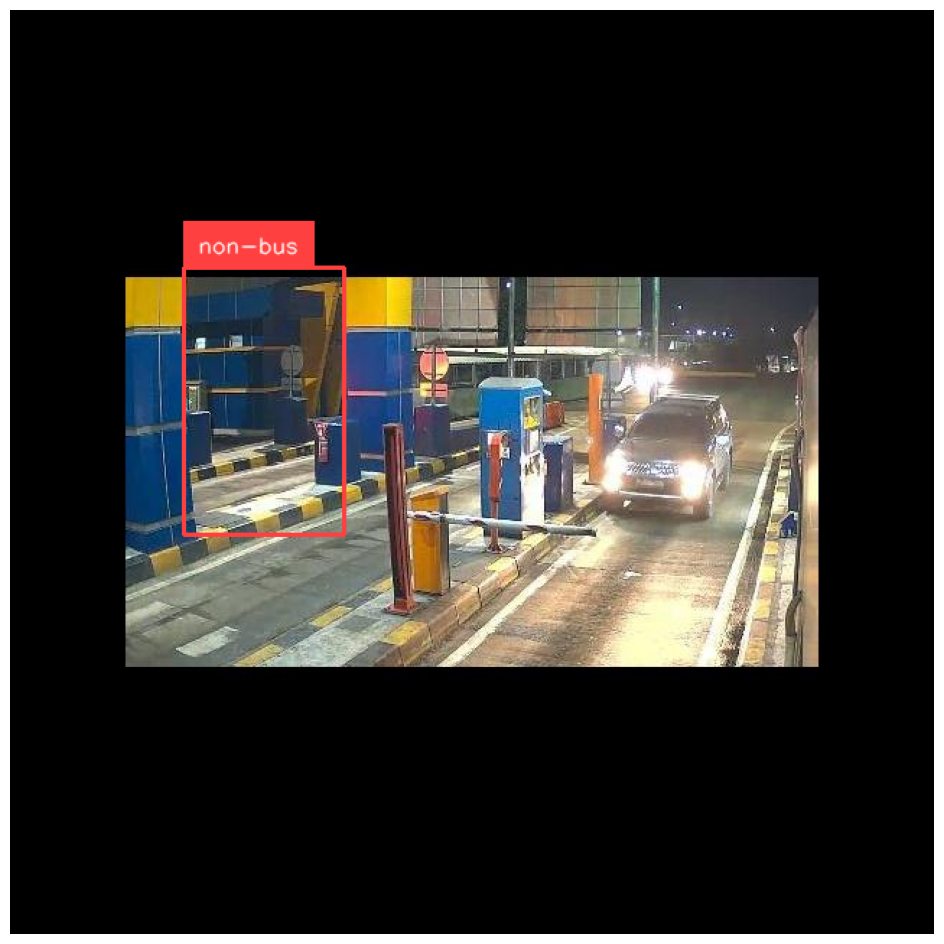

In [95]:
import random

i = random.randint(0, len(ds))

image_path, image, target = ds[i]

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results).with_nms()

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

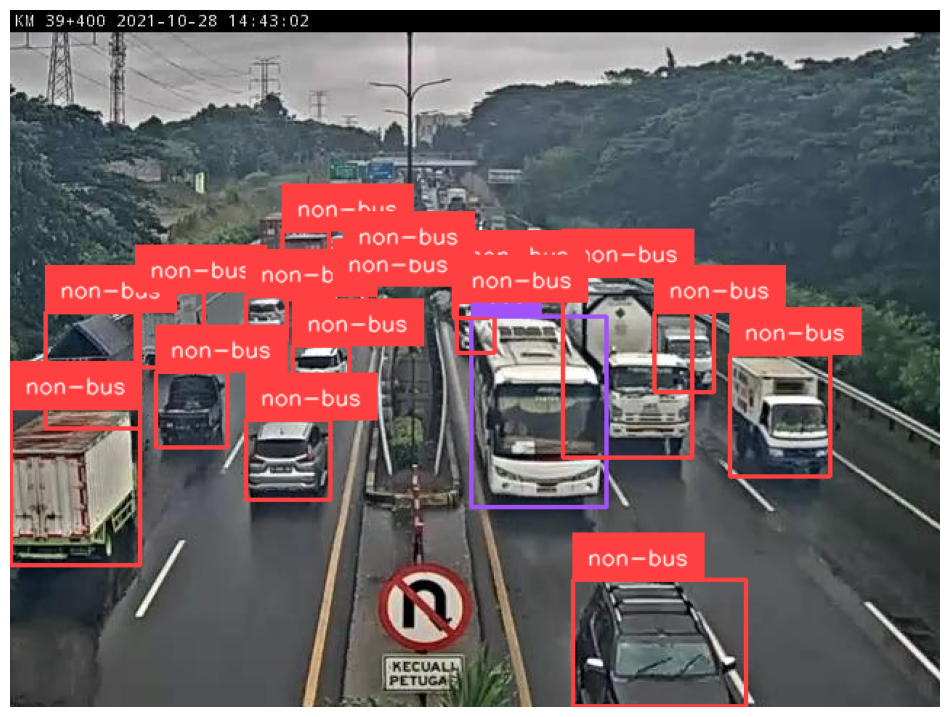

In [90]:
import cv2
import supervision as sv
from ultralytics import YOLO

image_path = f"{HOME}/bas.jpg"
image = cv2.imread(image_path)

model = YOLO(f'/{HOME}/yolov12nvehicle3kaggle.pt')

results = model(image, verbose=False)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [94]:
from ultralytics import YOLO
import os

# Your home directory in the Colab environment
HOME = os.getcwd()

# List of your models to compare
model_files = [
    'yolov12nultimatekaggle.pt',
    'yolov12nvehicle3kaggle.pt',
    'yolov12nvehicleColab.pt'
]

# Path to your dataset's data.yaml file
data_yaml_path = f"{dataset.location}/data.yaml"

# Loop through each model and run validation
for model_file in model_files:
    print(f"--- Validating Model: {model_file} ---")

    # Load the model
    model = YOLO(f'/{HOME}/{model_file}')

    # Run validation
    metrics = model.val(data=data_yaml_path)
    print("-" * 30)

--- Validating Model: yolov12nultimatekaggle.pt ---
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv12n summary (fused): 376 layers, 2,508,734 parameters, 0 gradients, 5.8 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 83.0MB/s]
val: Scanning /content/ultimate-1/valid/labels... 1314 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1314/1314 [00:00<00:00, 2007.74it/s]

val: New cache created: /content/ultimate-1/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [07:38<00:00,  5.52s/it]


                   all       1314       1316          1      0.995      0.995      0.961
                   bus        345        345          1      0.998      0.995      0.965
                no-bus        969        971          1      0.992      0.995      0.957
Speed: 2.6ms preprocess, 339.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val
------------------------------
--- Validating Model: yolov12nvehicle3kaggle.pt ---
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv12n summary (fused): 376 layers, 2,508,734 parameters, 0 gradients, 5.8 GFLOPs


val: Scanning /content/ultimate-1/valid/labels.cache... 1314 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1314/1314 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [07:42<00:00,  5.57s/it]


                   all       1314       1316      0.838      0.378      0.581      0.401
                   bus        345        345      0.676      0.757      0.763      0.543
               non-bus        969        971          1          0        0.4       0.26
Speed: 2.6ms preprocess, 342.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val2
------------------------------
--- Validating Model: yolov12nvehicleColab.pt ---
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv12n summary (fused): 376 layers, 2,508,734 parameters, 0 gradients, 5.8 GFLOPs


val: Scanning /content/ultimate-1/valid/labels.cache... 1314 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1314/1314 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 83/83 [07:43<00:00,  5.58s/it]


                   all       1314       1316      0.202      0.375      0.202     0.0919
                   bus        345        345      0.241      0.191       0.15     0.0631
               non-bus        969        971      0.162      0.559      0.255      0.121
Speed: 2.5ms preprocess, 343.0ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/val3
------------------------------
